In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [2]:
data = pd.read_excel("mtcars.xlsx")

In [3]:
data.corr()
#Observations
# 1. mpg is very much ralted with cyl , disp , hp , drat , wt. So using these columns as inputs

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.629274,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.579639,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.629274,0.579639,1.000000,0.503159,-0.514281,0.710122,-0.206063,-0.465399,-0.399187,-0.396687,0.291430
hp,-0.776168,0.832447,0.503159,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.514281,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.710122,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.206063,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.465399,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.399187,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.396687,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [4]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [5]:
#dropping 'qsec', 'vs', 'am', 'gear','carb' columns as these are less ralted to mpg column

data.drop(['qsec', 'vs', 'am', 'gear','carb'] , axis = 1 , inplace = True)

In [6]:
#dividing features and target variables

Y = data["mpg"]
Y = pd.DataFrame(Y , columns = ["mpg"])

X = data.drop(["mpg"] , axis = 1)

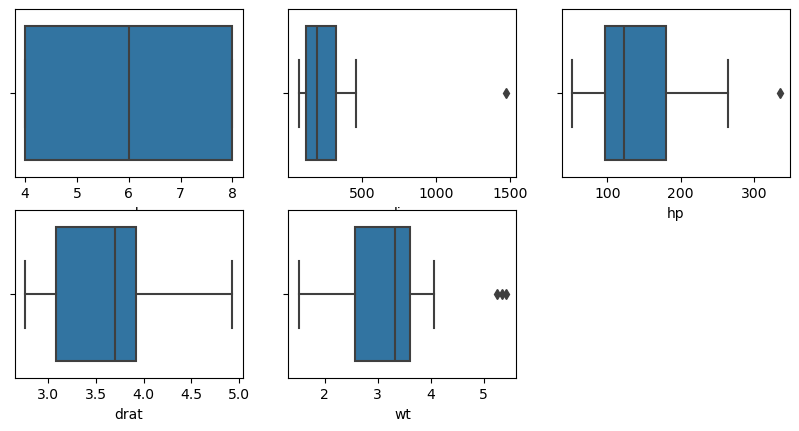

In [7]:
#Checking for Outliers

plt.figure(figsize=(10,10))
cnt=0
for each_col in X:
    cnt+=1
    plt.subplot(4,3,cnt)
    sns.boxplot(x=X[each_col])
    plt.title=each_col

In [8]:
#Handling outliers by replacing lower and higher values with lower and upper bound values

for i in X.columns:
    q1=X[i].quantile(0.25)
    q3=X[i].quantile(0.75)
    
    IQR=q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    
    higher_outliers = X[X[i]>upper_bound]
    higher_outliers = higher_outliers[i].values
    X[i] = X[i].replace({}.fromkeys(higher_outliers,upper_bound))
    
    lower_outliers = X[X[i]<lower_bound]
    lower_outliers = lower_outliers[i].values
    X[i] = X[i].replace({}.fromkeys(lower_outliers,lower_bound))

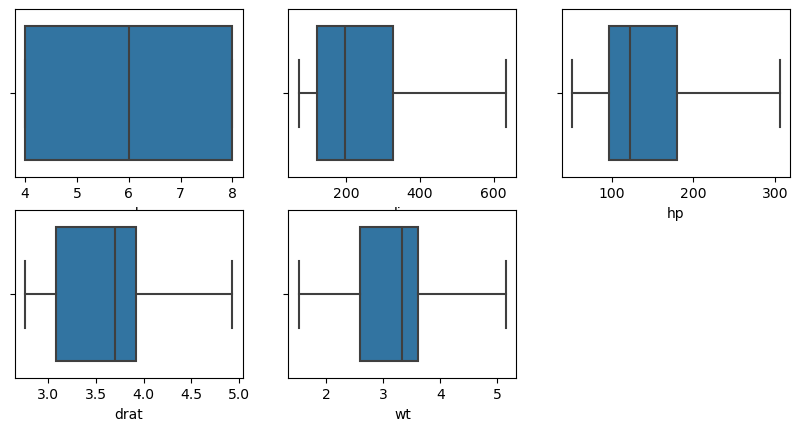

In [9]:
#Box plot after handling Outliers

plt.figure(figsize=(10,10))
cnt=0
for each_col in X:
    cnt+=1
    plt.subplot(4,3,cnt)
    sns.boxplot(x=X[each_col])
    plt.title=each_col

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 1)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train , Y_train )

LinearRegression()

In [13]:
print("Input Co-efficients:",lr.coef_)
print("Intercept:",lr.intercept_)

Input Co-efficients: [[ 0.11878269  0.00592139 -0.03282686  2.12206589 -3.51920542]]
Intercept: [26.35057255]


In [14]:
Y_pred = lr.predict(X_test)
Y_pred

array([[26.3550232 ],
       [20.20175028],
       [18.77294469],
       [30.345224  ],
       [15.73229722],
       [26.04092099],
       [17.72910597],
       [18.51218825]])

In [15]:
print("Actual values:" , Y_test.values)
print("Predicted values:" , Y_pred)

Actual values: [[30.4]
 [21.4]
 [15.2]
 [30.4]
 [13.3]
 [32.4]
 [15.5]
 [15.8]]
Predicted values: [[26.3550232 ]
 [20.20175028]
 [18.77294469]
 [30.345224  ]
 [15.73229722]
 [26.04092099]
 [17.72910597]
 [18.51218825]]


In [16]:
mse = mean_squared_error( Y_test , Y_pred )
rmse = np.sqrt(mse)

mae = mean_absolute_error( Y_test , Y_pred )

r2 = r2_score( Y_test , Y_pred )

print("Mean squared error:" , mse)
print("Root Mean Squared error:" , rmse)
print("Mean Absolute error:" , mae)
print("R2 score:" , r2)

Mean squared error: 11.155675998423463
Root Mean Squared error: 3.340011376990124
Mean Absolute error: 2.8254522081152778
R2 score: 0.8025281940359611
